In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

C:\Users\gnssl\anaconda3\envs\myvenv\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Lambda, Input, Dense
from tensorflow.keras.losses import mse, binary_crossentropy, kl_divergence
from tensorflow.keras import optimizers
from tensorflow.keras import backend as K

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import scale


import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("./cic_ids_smote03_pca25.csv")
#df = pd.read_csv("/Users/anchanghun/Downloads/CIC-Dataset/cleaned_improved_cicids2017.csv")

In [4]:
df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,label
0,3.755787,-1.071812,2.930933,-2.446960,3.825755,-6.790677,-9.097402,3.715448,-1.080617,0.002021,...,-2.334503,-1.591972,-0.751660,-0.430237,-0.189769,0.992952,-3.140185,3.106113,-0.005396,0
1,4.255976,-3.447895,-2.044386,0.607399,1.420579,0.635792,-1.034094,-1.987434,-2.420484,0.016586,...,0.399538,0.307386,0.392462,0.045101,0.053932,-0.531625,0.367233,-0.001627,0.483978,0
2,7.099579,-0.328671,15.021956,-4.085954,4.485459,-6.750818,-1.245696,12.284609,-12.470846,0.073562,...,-4.114029,2.403140,14.790264,-0.072217,-5.309932,-2.786611,9.262720,5.324074,-3.618367,0
3,5.499027,-2.232074,0.323932,-0.687445,3.269052,-1.383862,-6.764744,0.350936,-4.496568,0.037441,...,4.034838,2.231003,-0.575002,0.090285,1.567744,0.082298,-0.482082,1.259168,1.329641,0
4,5.595111,-2.244346,0.295866,-0.677989,3.272865,-1.382852,-6.767350,0.317522,-4.523027,0.037608,...,4.032456,2.232305,-0.571224,0.090600,1.565802,0.073913,-0.477891,1.255216,1.337643,0


In [5]:
df['label'].value_counts()

label
0    1594540
6     159454
8     159454
5     159454
4     159454
3     159454
2     159454
7     159454
1     159454
Name: count, dtype: int64

In [6]:
len(df.columns)

26

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df, test_size=0.1, random_state=42)
X_train.shape, X_test.shape

((2583154, 26), (287018, 26))

In [8]:
y_train = X_train['label']
X_train = X_train.drop(labels='label',axis=1)

In [9]:
X_test.shape

(287018, 26)

In [10]:
y_test = X_test['label']
X_test = X_test.drop(labels='label',axis=1)

In [11]:
import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.utils import plot_model
import tensorflow as tf
from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector, Conv1D, Conv1DTranspose
from keras.models import Model
from keras import regularizers
from keras_self_attention import SeqWeightedAttention, SeqSelfAttention
from keras.callbacks import EarlyStopping

In [12]:
import tensorflow as tf
from tensorflow.keras import layers, losses, Model, Input
import numpy as np
from tensorflow.keras import backend as K

# ✅ 클래스 개수 (정상 + 공격 유형 개수)
num_classes = 9  # 정상(1) + 8개 공격

# ✅ 잠재 차원 및 중간 차원 설정
latent_dim = 10
inter_dim = 20

# ✅ 샘플링 함수 (재매개변수화 트릭 사용)
def sampling(args):
    z_mean, z_log_sigma = args
    batch_size = tf.shape(z_mean)[0]
    epsilon = K.random_normal(shape=(batch_size, latent_dim), mean=0., stddev=1.)
    return z_mean + K.exp(0.5 * K.clip(z_log_sigma, -10, 10)) * epsilon

# ✅ CVAE 손실 함수 (Gaussian MLP & Bernoulli MLP 반영)
def cvae_loss(x, x_decoded_mean, z_mean, z_log_sigma, y_true, y_pred):
    # Reconstruction Loss (Gaussian MLP 적용)
    reconstruction_loss = K.mean(K.square(x - x_decoded_mean) + 1e-10)  # NaN 방지
    
    # KL Divergence (잠재 공간 학습 - Gaussian MLP)
    kl_loss = -0.5 * K.sum(1 + K.clip(z_log_sigma, -10, 10) - K.square(z_mean) - K.exp(K.clip(z_log_sigma, -10, 10)), axis=-1)
    kl_loss_weighted = kl_loss * 0.0001  # KL 손실 가중치 적용

    # Classification Loss (Bernoulli MLP 적용)
    classification_loss = tf.keras.losses.categorical_crossentropy(y_true, y_pred)  # 다중 분류
    
    # 총 손실 (Gaussian + Bernoulli)
    total_loss = K.mean(reconstruction_loss + kl_loss_weighted + classification_loss)
    return total_loss

# ✅ CVAE 모델 정의 (Gaussian MLP + Bernoulli MLP)
def cvae(X, y):
    features = X.shape[1]  # 특징 수
    input_x = Input(shape=(features,), name='InputFeatures')
    input_y = Input(shape=(num_classes,), name='InputLabels')  # 라벨 추가

    # CNN 기반 인코더
    reshaped_input = layers.Reshape((features, 1))(input_x)
    h = layers.Conv1D(filters=64, kernel_size=3, activation="relu", padding='same')(reshaped_input)
    h = layers.Conv1D(filters=32, kernel_size=3, activation="relu", padding='same')(h)
    h = layers.Conv1D(filters=16, kernel_size=3, activation="relu", padding='same')(h)
    h = layers.Flatten()(h)
    h = layers.Concatenate()([h, input_y])  # 라벨과 결합
    h = layers.Dense(inter_dim, activation='relu')(h)

    # Gaussian MLP (잠재 공간)
    z_mean = layers.Dense(latent_dim, name='z_mean')(h)
    z_log_sigma = layers.Dense(latent_dim, name='z_log_sigma')(h)
    z = layers.Lambda(sampling, name='z')([z_mean, z_log_sigma])

    # 디코더 (Gaussian MLP)
    decoder_input = layers.Concatenate()([z, input_y])  # 잠재 벡터 + 라벨
    decoder1 = layers.Dense(features * inter_dim)(decoder_input)
    decoder1 = layers.Reshape((features, inter_dim))(decoder1)
    decoder1 = layers.Conv1DTranspose(filters=16, kernel_size=3, activation="relu", padding='same')(decoder1)
    decoder1 = layers.Conv1DTranspose(filters=32, kernel_size=3, activation="relu", padding='same')(decoder1)
    decoder1 = layers.Conv1DTranspose(filters=64, kernel_size=3, activation="relu", padding='same')(decoder1)
    decoder1 = layers.Flatten()(decoder1)
    x_decoded_mean = layers.Dense(features, activation='sigmoid', name='ReconstructedOutput')(decoder1)  # 최종 복원

    # Bernoulli MLP (다중 분류)
    classification_output = layers.Dense(num_classes, activation='softmax', name='ClassificationOutput')(h)

    # 모델 생성
    model = Model([input_x, input_y], [x_decoded_mean, classification_output])
    model.add_loss(cvae_loss(input_x, x_decoded_mean, z_mean, z_log_sigma, input_y, classification_output))

    return model

# ✅ CVAE 학습 (정상 + 여러 공격 데이터 포함)
y_train_onehot = tf.keras.utils.to_categorical(y_train, num_classes)  # 라벨 원핫 인코딩
model = cvae(X_train, y_train_onehot)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit([X_train, y_train_onehot], [X_train, y_train_onehot],  # Reconstruction + Classification
                    shuffle=True, epochs=50, validation_split=0.1, batch_size=32,
                    callbacks=[early_stopping])

Epoch 1/50
72652/72652 [==============================] - 339s 5ms/step - loss: 2.5369 - ReconstructedOutput_accuracy: 0.8868 - ClassificationOutput_accuracy: 0.9992 - val_loss: 2.1734 - val_ReconstructedOutput_accuracy: 0.9291 - val_ClassificationOutput_accuracy: 1.0000
Epoch 2/50
72652/72652 [==============================] - 328s 5ms/step - loss: 2.5136 - ReconstructedOutput_accuracy: 0.9218 - ClassificationOutput_accuracy: 1.0000 - val_loss: 2.1724 - val_ReconstructedOutput_accuracy: 0.9121 - val_ClassificationOutput_accuracy: 1.0000
Epoch 3/50
72652/72652 [==============================] - 330s 5ms/step - loss: 2.5130 - ReconstructedOutput_accuracy: 0.9128 - ClassificationOutput_accuracy: 1.0000 - val_loss: 2.1729 - val_ReconstructedOutput_accuracy: 0.9122 - val_ClassificationOutput_accuracy: 1.0000
Epoch 4/50
72652/72652 [==============================] - 331s 5ms/step - loss: 2.5126 - ReconstructedOutput_accuracy: 0.9198 - ClassificationOutput_accuracy: 1.0000 - val_loss: 2.1724

In [13]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_shapes.png', show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [14]:
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 InputFeatures (InputLayer)     [(None, 25)]         0           []                               
                                                                                                  
 reshape (Reshape)              (None, 25, 1)        0           ['InputFeatures[0][0]']          
                                                                                                  
 conv1d (Conv1D)                (None, 25, 64)       256         ['reshape[0][0]']                
                                                                                                  
 conv1d_1 (Conv1D)              (None, 25, 32)       6176        ['conv1d[0][0]']                 
                                                                                              

 a)                                                                                               
                                                                                                  
 tf.math.multiply_1 (TFOpLambda  (None,)             0           ['tf.math.multiply[0][0]']       
 )                                                                                                
                                                                                                  
 tf.cast (TFOpLambda)           (None, 9)            0           ['InputLabels[0][0]']            
                                                                                                  
 tf.convert_to_tensor (TFOpLamb  (None, 9)           0           ['ClassificationOutput[0][0]']   
 da)                                                                                              
                                                                                                  
 tf.__oper

In [15]:
y_test_onehot = tf.keras.utils.to_categorical(y_test, num_classes)  # 라벨 원핫 인코딩

In [17]:
# ✅ 모델 예측 (CVAE는 2개 출력을 반환)
X_reconstructed, y_pred = model.predict([X_test, y_test_onehot])

# ✅ 복원 오류 (MSE) 계산 (X_reconstructed만 사용)
reconstruction_errors = np.mean(np.square(X_test - X_reconstructed), axis=1)

# ✅ error_df 생성 (실제 라벨 포함)
error_df = pd.DataFrame({
    'reconstruction_error': reconstruction_errors,
    'true_class': y_test  # 실제 라벨
})

# ✅ DataFrame 출력
print(error_df.head())


8970/8970 [==============================] - 15s 2ms/step
         reconstruction_error  true_class
1586856              1.934128           1
146821               0.675499           0
301814               0.358226           0
193979               0.173580           0
202567               0.592293           0


In [19]:
error_df['true_class'].value_counts()

true_class
0    159261
5     16072
8     16043
2     16025
3     15989
6     15957
4     15934
7     15889
1     15848
Name: count, dtype: int64

In [20]:
import numpy as np
import pandas as pd
from scipy.stats import genpareto

# ✅ 클래스별 EVT Threshold 적용 함수 (수정된 버전)
def calculate_evt_threshold_per_class(error_df, tail_fraction=0.1, quantile=0.95):
    thresholds = {}
    
    for cls in error_df['true_class'].unique():
        errors = error_df[error_df['true_class'] == cls]['reconstruction_error'].values
        
        if len(errors) < 10:
            # 샘플 수 부족 시, 기본 IQR 방식 사용
            Q1 = np.percentile(errors, 25)
            Q3 = np.percentile(errors, 75)
            IQR = Q3 - Q1
            thresholds[cls] = Q3 + 1.5 * IQR
        else:
            # ✅ median(class_errors) 기준으로 EVT 적용
            median_value = np.median(errors)
            errors = np.sort(errors)
            threshold_idx = int(len(errors) * (1 - tail_fraction))
            threshold_value = errors[threshold_idx]

            # ✅ Tail 부분 데이터 선택
            excesses = errors[threshold_idx:] - threshold_value

            # ✅ EVT 적용
            shape, loc, scale = genpareto.fit(excesses)
            evt_threshold = threshold_value + genpareto.ppf(quantile, shape, loc=loc, scale=scale)

            # ✅ Threshold가 이상할 경우 (클래스별 차이가 너무 큰 경우) 자동 조정
            max_threshold = np.percentile(errors, 99)  # 최대 99th Percentile 제한
            thresholds[cls] = min(evt_threshold, max_threshold)  # 둘 중 작은 값 적용

    return thresholds

# ✅ 새로운 Threshold 계산 적용
class_thresholds = calculate_evt_threshold_per_class(error_df)
error_df['threshold'] = error_df['true_class'].map(class_thresholds)
error_df['pred_class'] = (error_df['reconstruction_error'] > error_df['threshold']).astype(int)

# ✅ 적용된 새로운 Threshold 확인
print("\n✅ 수정된 클래스별 Threshold 값:")
print(pd.DataFrame(class_thresholds.items(), columns=["Class", "Threshold"]))



✅ 수정된 클래스별 Threshold 값:
   Class  Threshold
0      1   5.258872
1      0  28.236778
2      7   6.115108
3      5  13.850305
4      3   4.606050
5      6   0.854574
6      2   8.416362
7      4   8.609052
8      8   0.752127


8970/8970 [==============================] - 14s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000    159261
           1     1.0000    1.0000    1.0000     15848
           2     1.0000    1.0000    1.0000     16025
           3     1.0000    1.0000    1.0000     15989
           4     1.0000    1.0000    1.0000     15934
           5     1.0000    1.0000    1.0000     16072
           6     1.0000    1.0000    1.0000     15957
           7     1.0000    1.0000    1.0000     15889
           8     1.0000    1.0000    1.0000     16043

    accuracy                         1.0000    287018
   macro avg     1.0000    1.0000    1.0000    287018
weighted avg     1.0000    1.0000    1.0000    287018



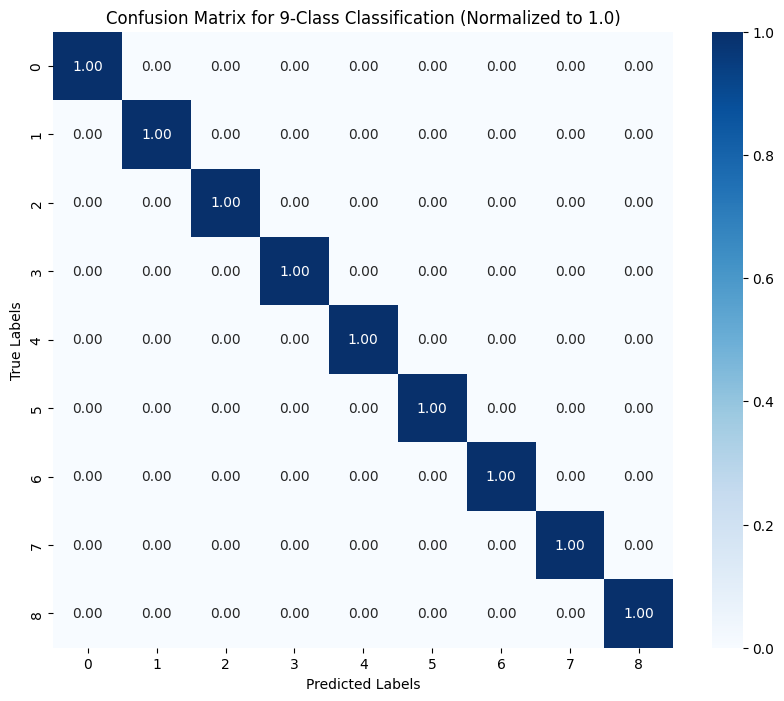

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# ✅ 실제 라벨과 예측 라벨을 준비
y_true = error_df['true_class'].values  # 실제 라벨

# ✅ y_pred는 CVAE의 다중 클래스 분류 네트워크 출력값이어야 함
_, y_pred_probs = model.predict([X_test, y_test_onehot])  # 다중 클래스 확률 출력
y_pred = np.argmax(y_pred_probs, axis=1)  # 가장 높은 확률을 가진 클래스로 예측

# ✅ 성능 평가 (Precision, Recall, F1-score)
print("Classification Report:")
print(classification_report(y_true, y_pred, digits=4))

# ✅ 혼동 행렬 생성 (Count 기반)
conf_matrix = confusion_matrix(y_true, y_pred)

# ✅ 1.0 기준 정규화 (각 행을 합이 1.0이 되도록 변환)
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1, keepdims=True)

# ✅ 혼동 행렬 시각화 (비율을 소수점 2자리까지 출력)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_normalized, annot=True, fmt=".2f", cmap="Blues", xticklabels=range(9), yticklabels=range(9))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for 9-Class Classification (Normalized to 1.0)")
plt.show()


In [26]:
print(np.unique(y_pred, return_counts=True))  # 예측된 라벨의 분포 확인


(array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int64), array([159261,  15848,  16025,  15989,  15934,  16072,  15957,  15889,
        16043], dtype=int64))


In [27]:
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)


Train shape: (2583154, 25) Test shape: (287018, 25)


In [28]:
print("y_test unique values:", np.unique(y_test))
print("y_test_onehot shape:", y_test_onehot.shape)
print("Sample y_test_onehot:", y_test_onehot[:5])  # 일부 샘플 출력


y_test unique values: [0 1 2 3 4 5 6 7 8]
y_test_onehot shape: (287018, 9)
Sample y_test_onehot: [[0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [29]:
# ✅ 예측된 클래스 확률 출력
print("Sample of y_pred_probs:\n", y_pred_probs[:5])

# ✅ 예측된 클래스의 분포 확인
unique_classes, class_counts = np.unique(y_pred, return_counts=True)
print("Predicted class distribution:")
for cls, count in zip(unique_classes, class_counts):
    print(f"Class {cls}: {count} samples")


Sample of y_pred_probs:
 [[2.2778136e-14 1.0000000e+00 7.1364347e-16 8.9985502e-15 9.5535929e-20
  1.5703288e-25 3.9060801e-21 1.6748907e-21 3.3002171e-31]
 [1.0000000e+00 7.1468757e-14 2.5440613e-11 5.0832382e-14 6.2969684e-16
  8.5627963e-11 1.7462649e-24 3.4331301e-12 1.1796276e-16]
 [1.0000000e+00 4.9290122e-15 2.0683789e-14 7.6238636e-17 3.0879935e-15
  1.1923671e-17 5.3247505e-25 9.7185033e-17 3.1185710e-15]
 [1.0000000e+00 1.9901244e-17 1.2157783e-16 8.7432907e-20 8.5238622e-12
  4.3914121e-18 1.4507254e-28 1.3349134e-18 2.2678722e-26]
 [1.0000000e+00 1.2082746e-12 1.2455289e-12 2.2207973e-16 4.3796682e-18
  6.8146552e-14 3.0145233e-18 1.2033688e-12 7.1211706e-18]]
Predicted class distribution:
Class 0: 159261 samples
Class 1: 15848 samples
Class 2: 16025 samples
Class 3: 15989 samples
Class 4: 15934 samples
Class 5: 16072 samples
Class 6: 15957 samples
Class 7: 15889 samples
Class 8: 16043 samples
